In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!source /content/drive/MyDrive/colab_env/bin/activate

import sys
sys.path.append("/content/drive/MyDrive/colab_env/lib/python3.10/site-packages")

In [ ]:
# !git clone https://github.com/huggingface/transformers.git

In [ ]:
!pip install transformers==4.30.2

In [4]:
import os
import re
import json
import emoji
import spacy
import pandas as pd
import transformers
import spacy_transformers
import matplotlib.pyplot as plt
from io import StringIO
from spacy.tokens import DocBin
from transformers import pipeline
from spacy.training import Example
from sklearn.model_selection import train_test_split
from spacy.pipeline.textcat_multilabel import Config, multi_label_cnn_config

In [5]:
%config InlineBackend.figure_format = 'retina'

In [6]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

## Preprocessing

In [ ]:
emoji_list = emoji.EMOJI_DATA

In [ ]:
def get_json(file_path):
    with open(file_path, 'r', encoding = 'utf-8') as file:
        content = json.load(file, strict = False)
    return content

In [ ]:
def rmemoji(text):
    return emoji.replace_emoji(text, '').strip()

def emoji2description(text):
    return emoji.replace_emoji(text, replace = lambda chars, data_dict: ' ' + ' '.join(data_dict['zh'].split('_')).strip(':') + ' ')

def remove_punctuation_regex(input_string):
    return re.sub(r'[^\w\s]', '', input_string)

In [8]:
os.chdir('/content/drive/MyDrive/Capstone/Spacy')

In [12]:
df = pd.read_csv('./data/df_emoji.csv')

In [13]:
print(len(df))
df.drop_duplicates(subset = ['text'], keep = 'last', inplace = True)
df['text'] = df['text'].replace(' ', '')
df = df[(df['text'] != '') & (df['text'].notnull())]
print(len(df))

121311
94167


## Labelling Data

### Chinese

In [15]:
df['text'] = df['text'].astype(str)

In [16]:
df.reset_index(inplace = True)

In [18]:
clf = pipeline('text-classification', model = "lxyuan/distilbert-base-multilingual-cased-sentiments-student", device = 0)

df['label_1'] = ''
df['score_1'] = ''

for i in range(len(df)):
    if isinstance(df['text'][i], str):
        result = clf(df['text'][i])

        if result[0]['score'] > 0.5:
            df.loc[i, 'label_1'] = result[0]['label']
            df.loc[i, 'score_1'] = result[0]['score']

    else:
        print(f"Ignoring invalid data: {df['text'][i]}")

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [20]:
clf = pipeline('text-classification', model = "IDEA-CCNL/Erlangshen-Roberta-330M-Sentiment", device = 0)

df['label_2'] = ''
df['score_2'] = ''

for i in range(len(df)):
    if isinstance(df['text'][i], str):
        result = clf(df['text'][i])

        if result[0]['score'] > 0.5:
            df.loc[i, 'label_2'] = result[0]['label']
            df.loc[i, 'score_2'] = result[0]['score']

    else:
        print(f"Ignoring invalid data: {df['text'][i]}")

config.json:   0%|          | 0.00/786 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [32]:
clf = pipeline("zero-shot-classification", model = "MoritzLaurer/mDeBERTa-v3-base-mnli-xnli", device = 0)

candidate_labels = ['positive', 'negative']
df['label_3'] = ''
df['score_3'] = ''

for i in range(len(df)):
    if isinstance(df['text'][i], str):
        result = clf(df['text'][i], candidate_labels, multi_label = False)

        if result['scores'][0] > 0.5:
            df.loc[i, 'label_3'] = result['labels'][0]
            df.loc[i, 'score_3'] = result['scores'][0]

    else:
        print(f"Ignoring invalid data: {df['text'][i]}")

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


KeyboardInterrupt: ignored

In [34]:
!pwd

/content/drive/MyDrive/Capstone/Spacy


In [35]:
df.to_csv('./Chat_Layer/1220aborted.csv', index = False)

### English

In [ ]:
d_en['text'] = d_en['text'].astype(str)

In [ ]:
d_en.reset_index(inplace = True)

In [ ]:
clf = pipeline('text-classification', model = "lxyuan/distilbert-base-multilingual-cased-sentiments-student")

d_en['label_1'] = ''
d_en['score_1'] = ''

for i in range(len(d_en)):
    if isinstance(d_en['text'][i], str):
        result = clf(d_en['text'][i])

        if result[0]['score'] > 0.5:
            d_en.loc[i, 'label_1'] = result[0]['label']
            d_en.loc[i, 'score_1'] = result[0]['score']

    else:
        print(f"Ignoring invalid data: {d_en['text'][i]}")

In [ ]:
clf = pipeline('text-classification', model = "IDEA-CCNL/Erlangshen-Roberta-330M-Sentiment")

d_en['label_2'] = ''
d_en['score_2'] = ''

for i in range(len(d_en)):
    if isinstance(d_en['text'][i], str):
        result = clf(d_en['text'][i])

        if result[0]['score'] > 0.5:
            d_en.loc[i, 'label_2'] = result[0]['label']
            d_en.loc[i, 'score_2'] = result[0]['score']

    else:
        print(f"Ignoring invalid data: {d_en['text'][i]}")

In [ ]:
d_zh.to_csv('/content/drive/MyDrive/Capstone/Spacy/Chat_Layer/data/d_zh.csv', index = False)
d_en.to_csv('/content/drive/MyDrive/Capstone/Spacy/Chat_Layer/data/d_en.csv', index = False)

### Deal w/ training data

In [ ]:
df['label_2'] = df['label_2'].map({'Positive': 'positive', 'Negative': 'negative'})
pos = df[(df['label_1'] == df['label_2']) & (df['label_1'] == 'positive')]
neg = df[(df['label_1'] == df['label_2']) & (df['label_1'] == 'negative')]
neu = df[df['label_1'] == 'neutral']

In [ ]:
df_pos = pd.DataFrame({
    'Unnamed: 0': pos['Unnamed: 0'],
    'TEXT': pos['text'],
    'LABEL': 'positive',
    'SCORE': (pos['score_1'] + pos['score_2'])/2
})


df_neg = pd.DataFrame({
    'Unnamed: 0': neg['Unnamed: 0'],
    'TEXT': neg['text'],
    'LABEL': 'negative',
    'SCORE': (neg['score_1'] + neg['score_2'])/2
})

df_neu = pd.DataFrame({
    'Unnamed: 0': neu['Unnamed: 0'],
    'TEXT': neu['text'],
    'LABEL': 'neutral',
    'SCORE': neu['score_1']
})

In [ ]:
df_pos.sort_values(by = ['SCORE'], ascending = False, inplace = True)  ## PR50 = 0.827372  ## Mean = 0.835834  ## Num = 8750
df_neg.sort_values(by = ['SCORE'], ascending = False, inplace = True)  ## PR50 = 0.834948  ## Mean = 0.835712  ## Num = 5875
df_neu.sort_values(by = ['SCORE'], ascending = False, inplace = True)  ## PR50 = 0.566229  ## Mean = 0.595928  ## Num = 918

In [ ]:
train_pos = df_pos[:4000]
train_neg = df_neg[:4000]
train_neu = df_neu[:800]

In [ ]:
train_pos

,Unnamed: 0,TEXT,LABEL,SCORE
3899,14637,他們感情超好啊,positive,0.997444
17292,59545,詩情超棒,positive,0.996919
17261,59440,書和好棒!!,positive,0.996501
17258,59432,書和好棒!!!!!,positive,0.996349
23911,81093,好的，感謝,positive,0.996137
...,...,...,...,...
17080,58802,哇哇哇…,positive,0.841503
20300,70281,西田有志,positive,0.841364
26644,90234,兩個都很強,positive,0.841325
23463,80056,首先需要金主爸爸來創一個新的聯盟,positive,0.841289


In [ ]:
os.chdir('/content/drive/MyDrive/Capstone/Chat_Layer/data')

In [ ]:
label_df_zh = pd.concat([df_pos, df_neg, df_neu])
label_df_zh.to_csv('label_df.csv', index = False)

In [ ]:
train_df = pd.concat([train_pos, train_neg, train_neu])
train_df.to_csv('train_df.csv', index = False)

In [ ]:
train_data, test_data = train_test_split(train_df, train_size = 0.7, random_state = 42)
# train_data_en, test_data_en = train_test_split(d_en[['text']], train_size = 0.7, random_state = 42)

## Training Process

In [ ]:
# !pip install transformers==4.30.2
# print(transformers.__version__)

4.30.2


In [ ]:
def get_json(file_path):
    with open(file_path, 'r', encoding = 'utf-8') as file:
        content = json.load(file, strict = False)
    return content

In [ ]:
def emoji2description(text):
  return emoji.replace_emoji(text, replace = lambda chars, data_dict: ' ' + ' '.join(data_dict['zh'].split('_')).strip(':'))

In [ ]:
def rmemoji(text):
  return emoji.replace_emoji(text, '').strip()

<h4> Remove Emoji

In [ ]:
df_rmemoji = train_df.copy()
print(len(df_rmemoji))
df_rmemoji['TEXT'] = df_rmemoji['TEXT'].astype(str).apply(rmemoji)
df_rmemoji.drop_duplicates(subset = ['TEXT'], keep = 'last', inplace = True)
df_rmemoji = df_rmemoji[(df_rmemoji['TEXT'] != '') & (df_rmemoji['TEXT'].notnull())]
print(len(df_rmemoji))

8800
8687


<h4> Emoji2Desc

In [ ]:
df_emoji2desc = train_df.copy()
print(len(df_emoji2desc))
df_emoji2desc['TEXT'] = df_emoji2desc['TEXT'].astype(str).apply(emoji2description)
df_emoji2desc.drop_duplicates(subset = ['TEXT'], keep = 'last', inplace = True)
df_emoji2desc = df_emoji2desc[(df_emoji2desc['TEXT'] != '') & (df_emoji2desc['TEXT'].notnull())]
print(len(df_emoji2desc))

8800
8800


In [ ]:
!python -m spacy download zh_core_web_trf  ## Blank model ## Only Download when opening a new task

In [ ]:
nlp = spacy.load('zh_core_web_trf')

config = Config().from_str(multi_label_cnn_config)

text_cat = nlp.add_pipe("textcat_multilabel", config = config)

labels = ['positive', 'negative', 'neutral']

for i in labels:
    text_cat.add_label(i)

In [ ]:
y = pd.get_dummies(train_df.LABEL)
y = y.to_dict('index')

dataset = list(zip(train_df['TEXT'],[{'cats': cats} for cats in y.values()]))

In [ ]:
train_df, test_df = train_test_split(train_df, train_size = 0.7, random_state = 42)
train_data, test_data = train_test_split(dataset, train_size = 0.7, random_state = 42)

找出 df_rmemoji 和 df_emoji2desc 有在 test set 裡面的

In [ ]:
ind = list(test_df['Unnamed: 0'])

In [ ]:
df_rmemoji = df_rmemoji[df_rmemoji['Unnamed: 0'].isin(ind)]
df_emoji2desc = df_emoji2desc[df_emoji2desc['Unnamed: 0'].isin(ind)]

In [ ]:
y_rmemoji = pd.get_dummies(df_rmemoji.LABEL)
y_rmemoji = y_rmemoji.to_dict('index')

dataset_rmemoji = list(zip(df_rmemoji['TEXT'],[{'cats': cats} for cats in y_rmemoji.values()]))

In [ ]:
dataset_rmemoji[0]

('他們感情超好啊', {'cats': {'negative': 0, 'neutral': 0, 'positive': 1}})

In [ ]:
y_emoji2desc = pd.get_dummies(df_emoji2desc.LABEL)
y_emoji2desc = y_emoji2desc.to_dict('index')

dataset_emoji2desc = list(zip(df_emoji2desc['TEXT'],[{'cats': cats} for cats in y_emoji2desc.values()]))

In [ ]:
dataset_emoji2desc[0]

('他們感情超好啊', {'cats': {'negative': 0, 'neutral': 0, 'positive': 1}})

In [ ]:
def make_docs(data):
    docs = []
    for text, annotations in data:
        if isinstance(text, str) and isinstance(annotations, dict):
            doc = nlp.make_doc(text)
            doc.cats = annotations.get("cats", {})
            docs.append(doc)
        else:
            print(f"Ignoring invalid data: {text}, {annotations}")
    return docs

In [ ]:
os.chdir('/content/drive/MyDrive/Capstone/Chat_Layer')

In [ ]:
num_texts = len(train_data)
train_docs = make_docs(train_data[:num_texts])
doc_bin_train = DocBin(docs = train_docs)
doc_bin_train.to_disk("./data/train.spacy")

In [ ]:
num_texts_val = len(test_data)
valid_docs = make_docs(test_data[:num_texts_val])
doc_bin_valid = DocBin(docs = valid_docs)
doc_bin_valid.to_disk("./data/valid.spacy")

In [ ]:
num_rmemoji = len(dataset_rmemoji)
valid_docs = make_docs(dataset_rmemoji[:num_rmemoji])
doc_bin_valid = DocBin(docs = valid_docs)
doc_bin_valid.to_disk("./data/valid_rmemoji.spacy")

In [ ]:
num_emoji2desc = len(dataset_emoji2desc)
valid_docs = make_docs(dataset_emoji2desc[:num_emoji2desc])
doc_bin_valid = DocBin(docs = valid_docs)
doc_bin_valid.to_disk("./data/valid_emoji2desc.spacy")

In [ ]:
!python -m spacy init fill-config ./base_config.cfg ./config.cfg

2023-12-16 02:54:39.055863: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 02:54:39.055916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 02:54:39.057257: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 02:54:40.257566: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


6160 (# of training data) / 128 (batch size) = 48.125 (steps / epoch)  
desired iteration = 200  
batch size = 6160 / 200 = 30.8

In [ ]:
!python -m spacy train config.cfg --output ./output_chat_1216 --gpu-id 0 --paths.train ./data/train.spacy --paths.dev ./data/valid.spacy

2023-12-16 03:01:48.728762: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 03:01:48.728812: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 03:01:48.730091: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 03:01:49.857996: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Saving to output directory: output_chat_1216
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel:

In [ ]:
data = data = """E,#,LOSS TRANSFORMER,LOSS TEXTCAT_MULTILABEL,CATS_SCORE,SCORE
0, 0, 0.05, 0.28, 52.04, 0.52
4, 200, 381.08, 52.43, 99.18, 0.99
8, 400, 30.29, 6.89, 99.11, 0.99
12, 600, 22.89, 5.09, 98.82, 0.99
16, 800, 21.75, 5.93, 98.92, 0.99
20, 1000, 5.97, 4.14, 98.00, 0.98
24, 1200, 6.07, 4.71, 96.75, 0.97
28, 1400, 7.69, 6.56, 97.98, 0.98
32, 1600, 6.37, 5.13, 97.71, 0.98
36, 1800, 4.72, 5.26, 96.87, 0.97
"""

result = pd.read_csv(StringIO(data))
print(result)

    E     #  LOSS TRANSFORMER  LOSS TEXTCAT_MULTILABEL  CATS_SCORE  SCORE
0   0     0              0.05                     0.28       52.04   0.52
1   4   200            381.08                    52.43       99.18   0.99
2   8   400             30.29                     6.89       99.11   0.99
3  12   600             22.89                     5.09       98.82   0.99
4  16   800             21.75                     5.93       98.92   0.99
5  20  1000              5.97                     4.14       98.00   0.98
6  24  1200              6.07                     4.71       96.75   0.97
7  28  1400              7.69                     6.56       97.98   0.98
8  32  1600              6.37                     5.13       97.71   0.98
9  36  1800              4.72                     5.26       96.87   0.97


In [ ]:
result

,E,#,LOSS TRANSFORMER,LOSS TEXTCAT_MULTILABEL,CATS_SCORE,SCORE
0,0,0,0.05,0.28,52.04,0.52
1,4,200,381.08,52.43,99.18,0.99
2,8,400,30.29,6.89,99.11,0.99
3,12,600,22.89,5.09,98.82,0.99
4,16,800,21.75,5.93,98.92,0.99
5,20,1000,5.97,4.14,98.00,0.98
6,24,1200,6.07,4.71,96.75,0.97
7,28,1400,7.69,6.56,97.98,0.98
8,32,1600,6.37,5.13,97.71,0.98
9,36,1800,4.72,5.26,96.87,0.97


In [ ]:
result.to_csv('Chat_Layer_training_result.csv', index = False)

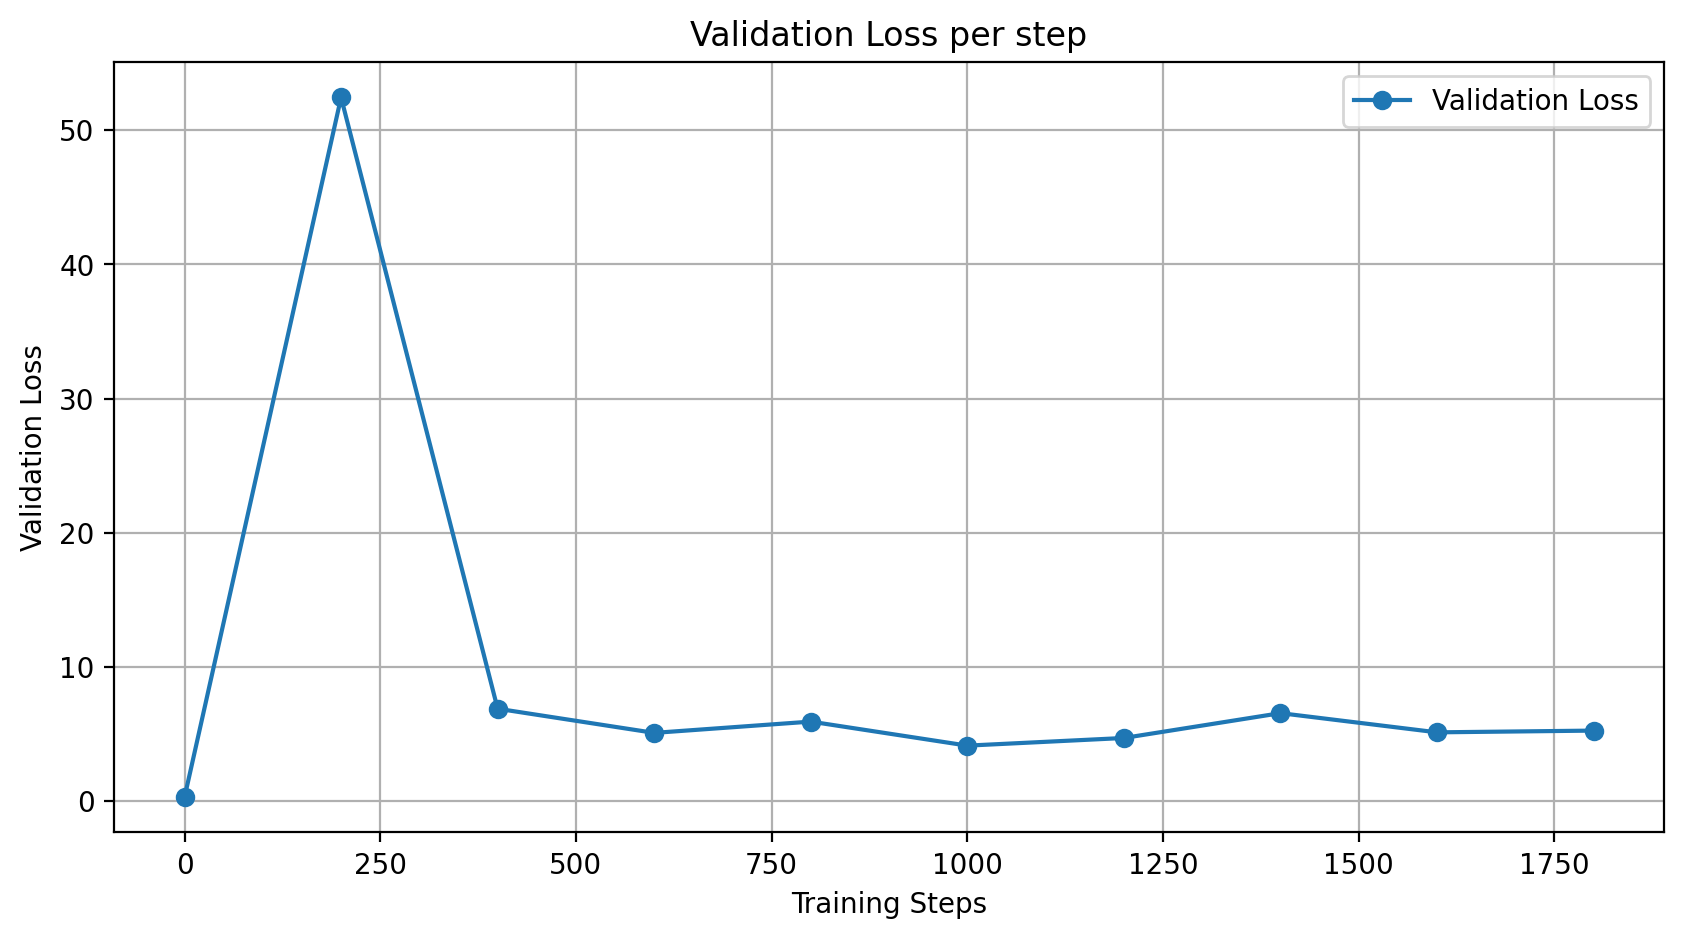

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(result['#'], result['LOSS TEXTCAT_MULTILABEL'], label = 'Validation Loss', marker = 'o')

plt.xlabel('Training Steps')
plt.ylabel('Validation Loss')
plt.title('Validation Loss per step')
plt.legend()
plt.grid(True)
plt.show()

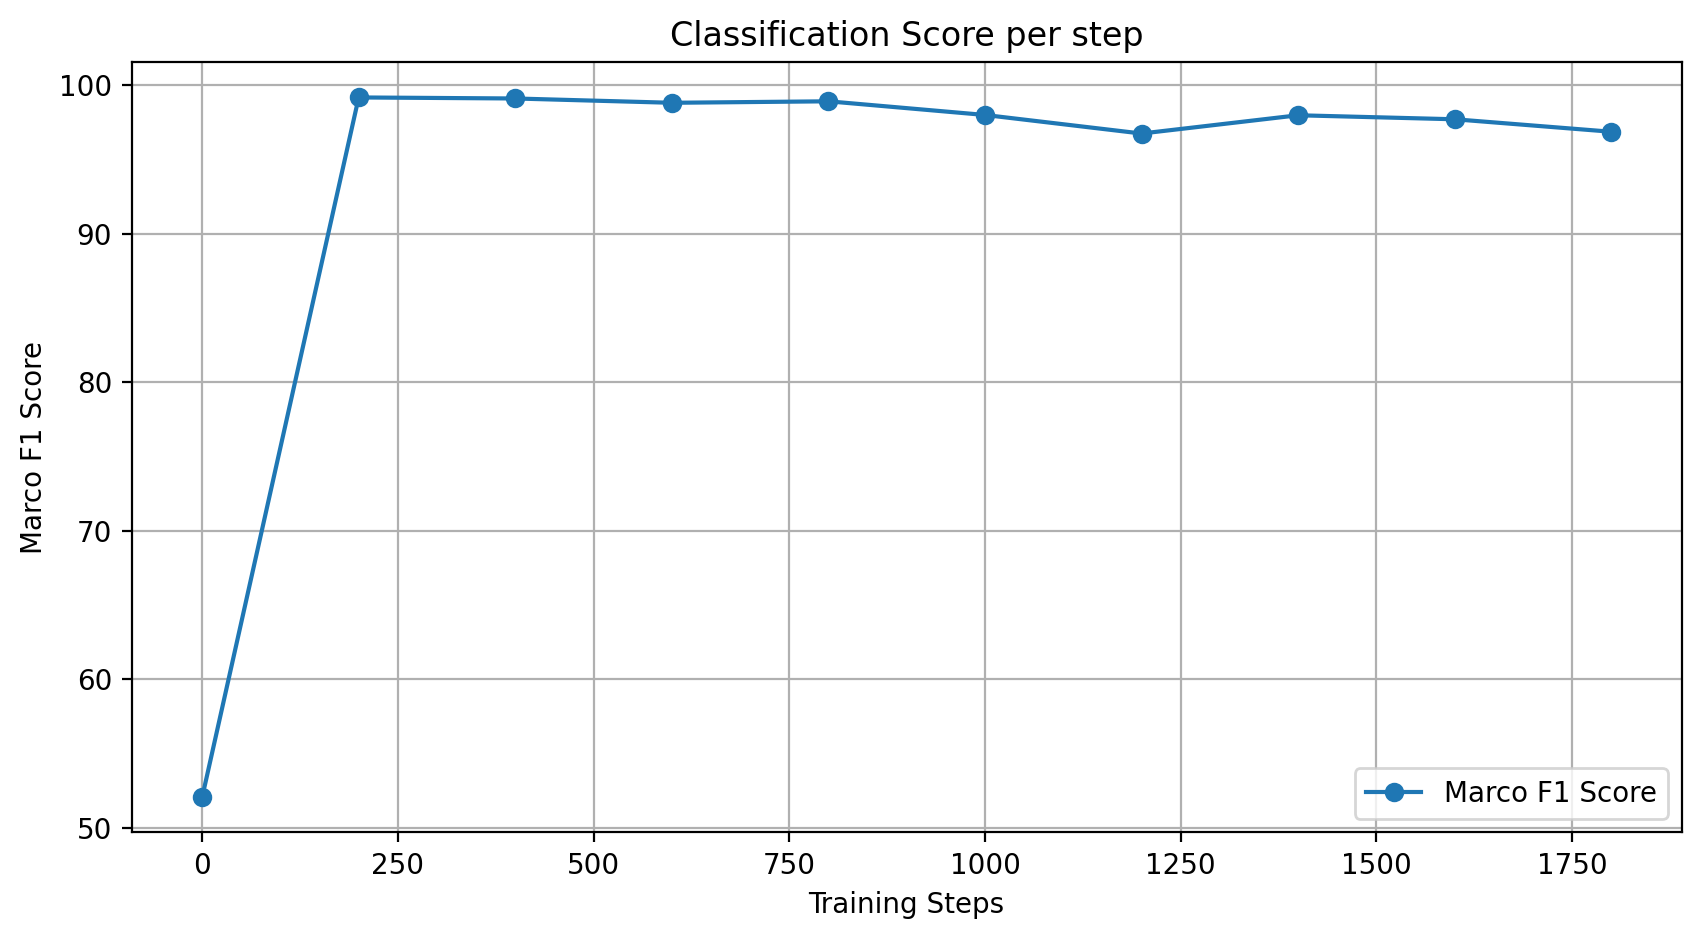

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(result['#'], result['CATS_SCORE'], label = 'Marco F1 Score', marker = 'o')

plt.xlabel('Training Steps')
plt.ylabel('Marco F1 Score')
plt.title('Classification Score per step')
plt.legend()
plt.grid(True)
plt.show()

<h3> Training Sample </h3>

positive    2800 / negative    2800 / neutral      560

<h3> Testing Sample </h3>

positive    1200 / negative    1200 / neutral      240

In [ ]:
!python -m spacy evaluate output_chat_1216/model-best/ --output ./output_chat_1216/metrics.json ./data/valid.spacy --gpu-id 0

2023-12-16 03:17:58.451692: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 03:17:58.451741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 03:17:58.452926: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 03:17:59.602323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Using GPU: 0

================================== Results ==================================

TOK                   100.00
TEXTCAT (macro AUC)   99.18 
SPEED                 2302  


=========================== Textcat F (per label) =======

In [ ]:
!python -m spacy evaluate output_chat_1216/model-best/ --output ./output_chat_1216/metrics_rmemoji.json ./data/valid_rmemoji.spacy --gpu-id 0

2023-12-16 03:18:19.910036: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 03:18:19.910095: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 03:18:19.911295: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 03:18:21.472820: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Using GPU: 0

================================== Results ==================================

TOK                   100.00
TEXTCAT (macro AUC)   99.19 
SPEED                 2721  


=========================== Textcat F (per label) =======

In [ ]:
!python -m spacy evaluate output_chat_1216/model-best/ --output ./output_chat_1216/metrics_emoji2desc.json ./data/valid_emoji2desc.spacy --gpu-id 0

2023-12-16 03:18:41.301653: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 03:18:41.301702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 03:18:41.302846: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 03:18:42.404982: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Using GPU: 0

================================== Results ==================================

TOK                   100.00
TEXTCAT (macro AUC)   99.19 
SPEED                 2303  


=========================== Textcat F (per label) =======

In [ ]:
os.chdir('./output_chat_1216')

In [ ]:
score = get_json('./metrics.json')
score_rmemoji = get_json('./metrics_rmemoji.json')
score_emoji2desc = get_json('./metrics_emoji2desc.json')

In [ ]:
p = ['cats_score', 'cats_macro_p', 'cats_macro_r', 'cats_macro_f']

performance_raw = pd.DataFrame({
    'CATS_SCORE': score[p[0]],
    'CATS_MARCO_P': score[p[1]],
    'CATS_MARCO_R': score[p[2]],
    'CATS_MARCO_F': score[p[3]]
}, index = ['RAW'])

performance_rmemoji = pd.DataFrame({
    'CATS_SCORE': score_rmemoji[p[0]],
    'CATS_MARCO_P': score_rmemoji[p[1]],
    'CATS_MARCO_R': score_rmemoji[p[2]],
    'CATS_MARCO_F': score_rmemoji[p[3]]
}, index = ['Remove Emoji'])

performance_emoji2desc = pd.DataFrame({
    'CATS_SCORE': score_emoji2desc[p[0]],
    'CATS_MARCO_P': score_emoji2desc[p[1]],
    'CATS_MARCO_R': score_emoji2desc[p[2]],
    'CATS_MARCO_F': score_emoji2desc[p[3]]
}, index = ['Emoji to Description'])

performance = pd.concat([performance_raw, performance_rmemoji, performance_emoji2desc])
performance.index.name = 'METHOD'

In [ ]:
performance.style.highlight_max(axis = 0, color = 'red').highlight_min(axis = 0, color = 'lightblue')

,CATS_SCORE,CATS_MARCO_P,CATS_MARCO_R,CATS_MARCO_F
METHOD,,,,
RAW,0.991785,0.941681,0.932211,0.936348
Remove Emoji,0.991924,0.940806,0.932694,0.936156
Emoji to Description,0.991947,0.939844,0.929767,0.934145


In [ ]:
performance.to_csv('prf_cf_emoji.csv')

In [ ]:
cats_f_per_type = score['cats_f_per_type']
df_cats_f_per_type = pd.DataFrame(cats_f_per_type).T
df_cats_f_per_type = df_cats_f_per_type.rename(columns = {'p': 'PRECISION', 'r': 'RECALL', 'f': 'F1'})

df_cats_f_per_type.index.name = 'CATEGORY'

In [ ]:
df_cats_f_per_type.style.highlight_max(axis = 0, color = 'red').highlight_min(axis = 0, color = 'lightblue')

,PRECISION,RECALL,F1
CATEGORY,,,
negative,0.986690,0.924356,0.954506
neutral,0.894309,0.876494,0.885312
positive,0.944045,0.995784,0.969224


In [ ]:
df_cats_f_per_type.to_csv('prf_cf_cats.csv')

In [ ]:
cats_f_per_type_score = score['cats_f_per_type']
cats_f_per_type_rmemoji = score_rmemoji['cats_f_per_type']
cats_f_per_type_emoji2desc = score_emoji2desc['cats_f_per_type']

df_cats_f_per_type_score = pd.DataFrame(cats_f_per_type_score).T
df_cats_f_per_type_rmemoji = pd.DataFrame(cats_f_per_type_rmemoji).T
df_cats_f_per_type_emoji2desc = pd.DataFrame(cats_f_per_type_emoji2desc).T

df_cats_f_per_type_score = df_cats_f_per_type_score.rename(columns={'f': 'RAW'})
df_cats_f_per_type_rmemoji = df_cats_f_per_type_rmemoji.rename(columns={'f': 'Remove Emoji'})
df_cats_f_per_type_emoji2desc = df_cats_f_per_type_emoji2desc.rename(columns={'f': 'Emoji to Description'})

df_cats = pd.concat([df_cats_f_per_type_score[['RAW']], df_cats_f_per_type_rmemoji[['Remove Emoji']], df_cats_f_per_type_emoji2desc[['Emoji to Description']]], axis = 1)
df_cats.index.name = 'F1 score'

In [ ]:
df_cats.style.highlight_max(axis = 1, color = 'red').highlight_min(axis = 1, color = 'lightblue')

,RAW,Remove Emoji,Emoji to Description
F1 score,,,
negative,0.954506,0.954407,0.952381
neutral,0.885312,0.885246,0.884848
positive,0.969224,0.968815,0.965207


In [ ]:
df_cats.to_csv('f1_cf_cats_emoji.csv')